# Flights Fare Prediction

## Importing libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Reading

In [61]:
df=pd.read_excel(r'C:\Users\chandu\Documents\Python Scripts\Machine Learning\Projects\Projects to be done\Flight price prediction\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Null value treatment 

In [62]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [63]:
#Here we have only one null value, we dorp it
df=df.dropna()
df.shape

(10682, 11)

## Duplicated rows treatment

In [64]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


We found 220 duplicated rows in our data set so we gonna delet it.

In [65]:
#code used to drop duplicates
df=df.drop_duplicates()
df.shape

(10462, 11)

## Data type  Conversion

In [66]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [67]:
# We creat a Journey_day & Journey_month by  using Date_of_Journey  with to_daytime formet
df['Journey_day'] =pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y" ).dt.day #.dt.day method will extract only day of that date
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'], format = '%d/%m/%Y').dt.month #.dt.month method will extract only month of that date
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [68]:
df = df.drop(["Date_of_Journey"], axis = 1)

In [69]:
# Departure time is when a plane leaves the gate. 

df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour # Extracting Hours
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute # Extracting Minutes
df=df.drop('Dep_Time', axis = 1) # Droping Dep_time as it's of no use now

In [70]:
# Arrival time is when the plane pulls up to the gate.

df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour # Extracting Hours
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute # Extracting Minutes
df=df.drop('Arrival_Time', axis = 1) # Droping Arrival_Time as it's of no use now

In [71]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assign ing and converting Duration column into list
duration = list(df["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:     # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i].strip()   # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [72]:
df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins
df=df.drop('Duration', axis = 1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Journey_day      10462 non-null  int64 
 8   Journey_month    10462 non-null  int64 
 9   Dep_hour         10462 non-null  int64 
 10  Dep_min          10462 non-null  int64 
 11  Arrival_hour     10462 non-null  int64 
 12  Arrival_min      10462 non-null  int64 
 13  Duration_hours   10462 non-null  int64 
 14  Duration_mins    10462 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [74]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


## Handling Categorical Data¶
One can find many ways to handle categorical data. Some of the categorical data are,

> <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: red;">**OneHotEncoder**</span> is used in this case

> <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: red;">**LabelEncoder**</span> is used in this case

In [75]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [76]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

airline = df[["Airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [77]:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [78]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

source = df[['Source']]

source = pd.get_dummies(source, drop_first = True)

source.head(3)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


In [79]:
df.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [80]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

destination = df[['Destination']]

destination = pd.get_dummies(destination, drop_first = True)

destination.head(3)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [81]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [82]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df = df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [83]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25


In [84]:
df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [85]:
df.Additional_Info.value_counts(normalize = True)

No info                         0.782068
In-flight meal not included     0.184095
No check-in baggage included    0.030396
1 Long layover                  0.001816
Change airports                 0.000669
Business class                  0.000382
No Info                         0.000287
1 Short layover                 0.000096
2 Long layover                  0.000096
Red-eye flight                  0.000096
Name: Additional_Info, dtype: float64

In [86]:
# Route and Total_Stops are related to each other
# Additional_Info contains almost 78% no_info

df = df.drop(["Route", "Additional_Info"], axis = 1)

In [87]:
df = pd.concat([df, airline, source, destination],axis = 1)

In [88]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0


## Count of Airline

In [89]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price

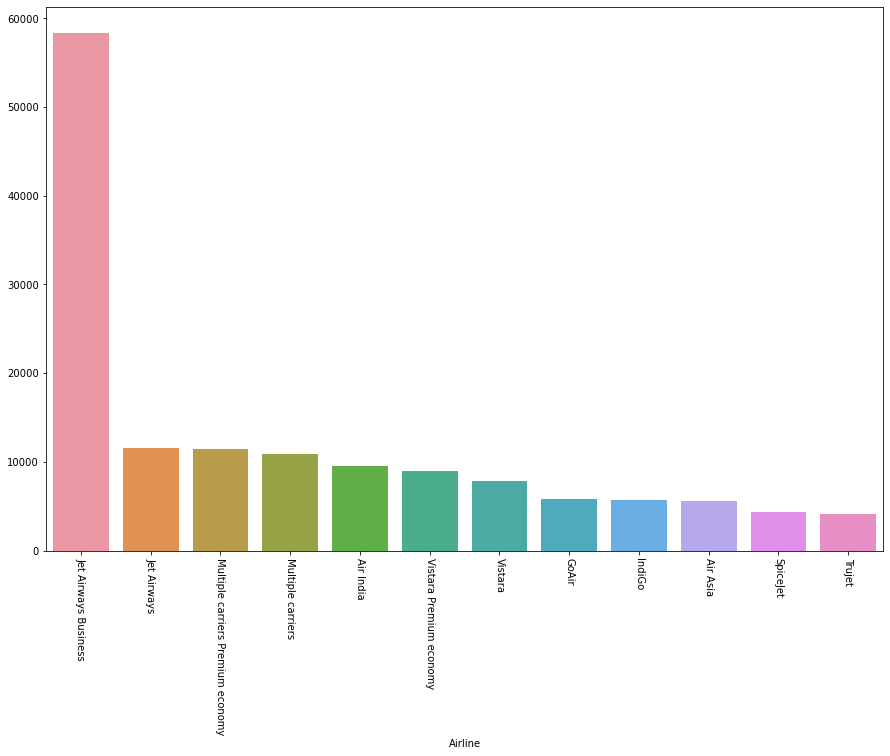

In [90]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270);

Jet Airways Business has the highest price with Trujet having the lowest

<function matplotlib.pyplot.show(close=None, block=None)>

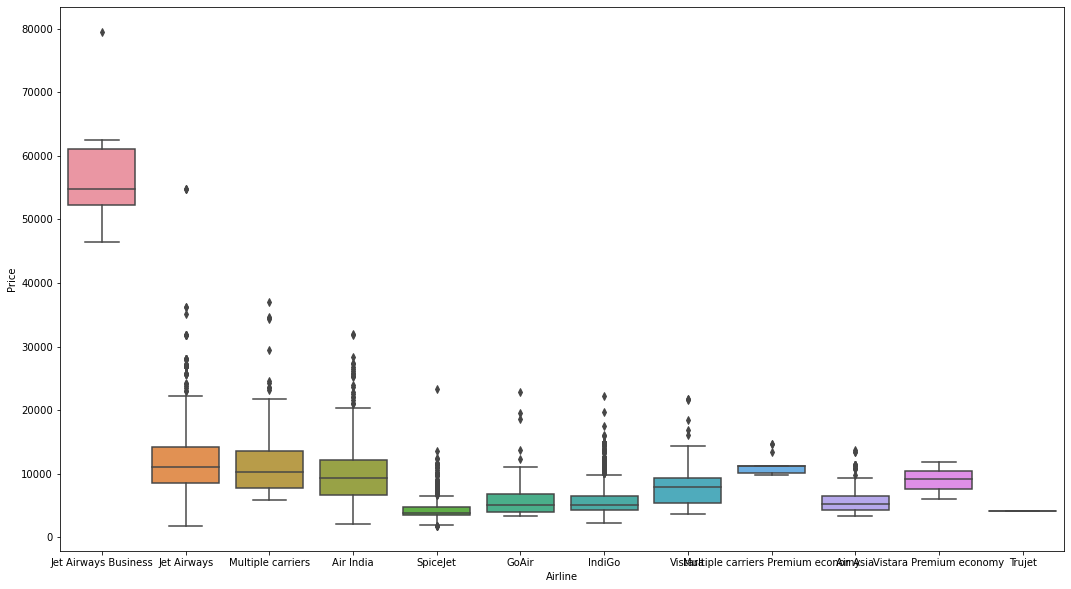

In [91]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

## Price based on number of stops

In [92]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           0               4492.331492
                                   1               7078.325581
                                   2               6341.888889
Air India                          0               5600.552885
                                   1               9041.509259
                                   2              12146.860399
                                   3              12339.057143
                                   4              17686.000000
GoAir                              0               4726.173913
                                   1               6884.676471
IndiGo                             0               4714.865963
                                   1               7104.717528
                                   2               7507.526316
Jet Airways                        0               6173.384244
                                   1              12512.741223
        

In [93]:
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Source vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

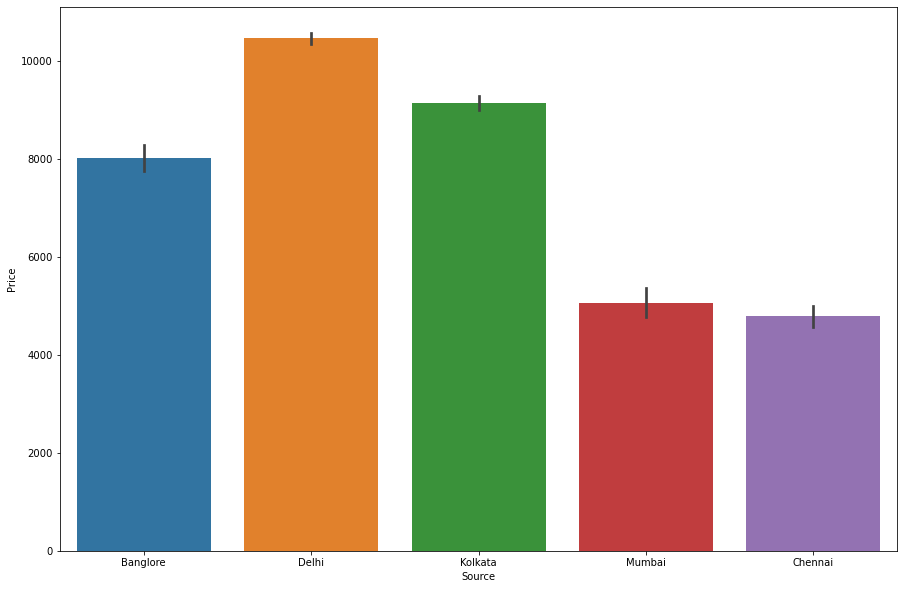

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

## Destination vs Price

In [95]:
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [96]:
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')

In [97]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

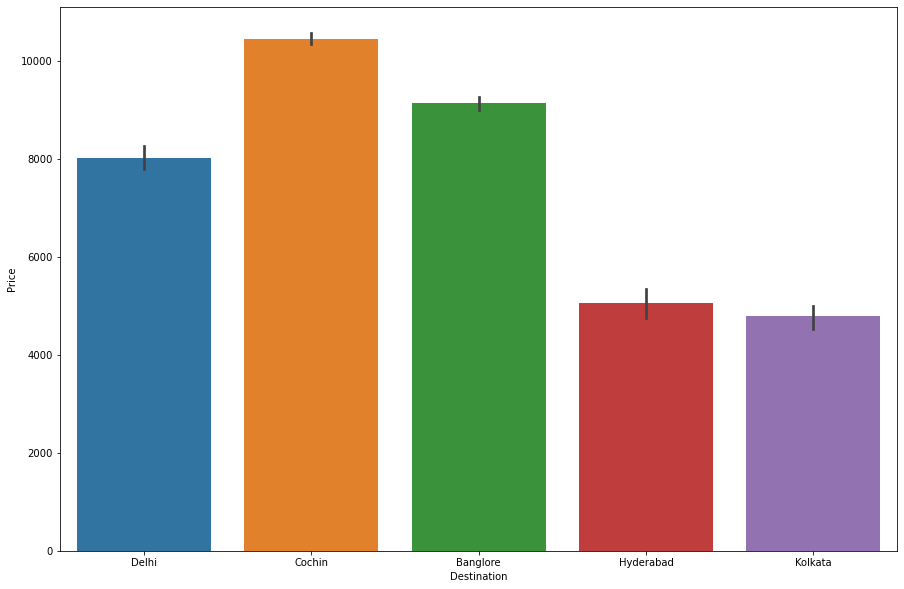

In [98]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show();

In [99]:
df = df.drop(['Airline', 'Source', 'Destination'], axis = 1)

In [100]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## train_test_split

In [101]:
X = df.drop('Price', axis = 1)

In [102]:
y=df.Price

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 0)

## Fitting model using Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [105]:
y_pred = reg_rf.predict(X_test)

In [106]:
reg_rf.score(X_train, y_train)

0.9532341137194051

In [107]:
reg_rf.score(X_test, y_test)

0.7944673762521847

In [108]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1225.6291588003094
MSE: 4331732.676490193
RMSE: 2081.2814986181456


In [109]:
# !pip install catboost

In [110]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.056969
0:	learn: 4488.6602588	total: 9.95ms	remaining: 9.95s
1:	learn: 4332.3836787	total: 19ms	remaining: 9.5s
2:	learn: 4187.8743567	total: 27.2ms	remaining: 9.05s
3:	learn: 4066.4897879	total: 33.7ms	remaining: 8.4s
4:	learn: 3952.7873527	total: 39.3ms	remaining: 7.81s
5:	learn: 3836.0129847	total: 45ms	remaining: 7.45s
6:	learn: 3726.5786478	total: 50.5ms	remaining: 7.17s
7:	learn: 3624.2597293	total: 56.1ms	remaining: 6.96s
8:	learn: 3546.4537700	total: 62ms	remaining: 6.82s
9:	learn: 3471.9396570	total: 67.6ms	remaining: 6.69s
10:	learn: 3390.9444789	total: 73.4ms	remaining: 6.6s
11:	learn: 3333.2837636	total: 78.9ms	remaining: 6.5s
12:	learn: 3278.3186742	total: 84.3ms	remaining: 6.4s
13:	learn: 3209.0087729	total: 91ms	remaining: 6.41s
14:	learn: 3151.6135159	total: 96.6ms	remaining: 6.34s
15:	learn: 3107.3237931	total: 115ms	remaining: 7.1s
16:	learn: 3052.4956523	total: 126ms	remaining: 7.27s
17:	learn: 2997.9236903	total: 132ms	remaining: 7.2s
18:	lear

156:	learn: 1950.8465806	total: 1.16s	remaining: 6.24s
157:	learn: 1949.0773737	total: 1.17s	remaining: 6.22s
158:	learn: 1948.0049653	total: 1.17s	remaining: 6.2s
159:	learn: 1944.9668626	total: 1.2s	remaining: 6.31s
160:	learn: 1943.8638035	total: 1.21s	remaining: 6.32s
161:	learn: 1941.8071313	total: 1.22s	remaining: 6.3s
162:	learn: 1939.1618228	total: 1.22s	remaining: 6.29s
163:	learn: 1938.5109324	total: 1.23s	remaining: 6.27s
164:	learn: 1935.5652818	total: 1.24s	remaining: 6.27s
165:	learn: 1933.2774673	total: 1.25s	remaining: 6.29s
166:	learn: 1930.2232788	total: 1.26s	remaining: 6.27s
167:	learn: 1929.2597191	total: 1.26s	remaining: 6.26s
168:	learn: 1927.1213512	total: 1.27s	remaining: 6.25s
169:	learn: 1924.7544230	total: 1.28s	remaining: 6.23s
170:	learn: 1922.4773161	total: 1.28s	remaining: 6.21s
171:	learn: 1920.0267311	total: 1.29s	remaining: 6.21s
172:	learn: 1918.5925033	total: 1.29s	remaining: 6.19s
173:	learn: 1917.0758614	total: 1.3s	remaining: 6.17s
174:	learn: 19

315:	learn: 1756.8404363	total: 2.16s	remaining: 4.68s
316:	learn: 1755.4456861	total: 2.17s	remaining: 4.69s
317:	learn: 1753.4975610	total: 2.19s	remaining: 4.69s
318:	learn: 1752.1596632	total: 2.19s	remaining: 4.68s
319:	learn: 1750.9505422	total: 2.2s	remaining: 4.67s
320:	learn: 1749.2704616	total: 2.2s	remaining: 4.66s
321:	learn: 1749.1740917	total: 2.21s	remaining: 4.65s
322:	learn: 1747.1483996	total: 2.21s	remaining: 4.64s
323:	learn: 1745.5436388	total: 2.22s	remaining: 4.64s
324:	learn: 1744.4552575	total: 2.23s	remaining: 4.63s
325:	learn: 1743.2067209	total: 2.23s	remaining: 4.62s
326:	learn: 1741.8326417	total: 2.24s	remaining: 4.61s
327:	learn: 1740.4816168	total: 2.25s	remaining: 4.6s
328:	learn: 1740.3568352	total: 2.25s	remaining: 4.59s
329:	learn: 1738.7624778	total: 2.26s	remaining: 4.58s
330:	learn: 1737.4136891	total: 2.26s	remaining: 4.57s
331:	learn: 1736.1791810	total: 2.27s	remaining: 4.56s
332:	learn: 1736.0877827	total: 2.27s	remaining: 4.55s
333:	learn: 1

478:	learn: 1620.8575857	total: 3.12s	remaining: 3.4s
479:	learn: 1620.0222903	total: 3.13s	remaining: 3.39s
480:	learn: 1619.4656527	total: 3.14s	remaining: 3.39s
481:	learn: 1618.5504784	total: 3.15s	remaining: 3.39s
482:	learn: 1618.1701313	total: 3.18s	remaining: 3.41s
483:	learn: 1617.9937973	total: 3.19s	remaining: 3.4s
484:	learn: 1617.3033692	total: 3.2s	remaining: 3.4s
485:	learn: 1616.6453951	total: 3.21s	remaining: 3.39s
486:	learn: 1615.6992149	total: 3.21s	remaining: 3.38s
487:	learn: 1614.6569340	total: 3.22s	remaining: 3.38s
488:	learn: 1613.8381449	total: 3.23s	remaining: 3.37s
489:	learn: 1613.4009904	total: 3.23s	remaining: 3.37s
490:	learn: 1612.2641331	total: 3.24s	remaining: 3.36s
491:	learn: 1611.6317487	total: 3.25s	remaining: 3.35s
492:	learn: 1610.9798520	total: 3.25s	remaining: 3.35s
493:	learn: 1610.2416924	total: 3.26s	remaining: 3.34s
494:	learn: 1609.5222791	total: 3.26s	remaining: 3.33s
495:	learn: 1609.3646132	total: 3.27s	remaining: 3.32s
496:	learn: 16

631:	learn: 1524.5664606	total: 4.28s	remaining: 2.49s
632:	learn: 1524.1928900	total: 4.29s	remaining: 2.48s
633:	learn: 1523.5622813	total: 4.29s	remaining: 2.48s
634:	learn: 1522.9572536	total: 4.3s	remaining: 2.47s
635:	learn: 1522.3662403	total: 4.31s	remaining: 2.47s
636:	learn: 1521.7924933	total: 4.32s	remaining: 2.46s
637:	learn: 1521.4085439	total: 4.33s	remaining: 2.46s
638:	learn: 1520.9216252	total: 4.33s	remaining: 2.45s
639:	learn: 1520.1912226	total: 4.34s	remaining: 2.44s
640:	learn: 1519.6687694	total: 4.35s	remaining: 2.43s
641:	learn: 1518.9440130	total: 4.35s	remaining: 2.43s
642:	learn: 1518.4633018	total: 4.36s	remaining: 2.42s
643:	learn: 1517.9359654	total: 4.36s	remaining: 2.41s
644:	learn: 1517.1024200	total: 4.37s	remaining: 2.41s
645:	learn: 1516.8361215	total: 4.38s	remaining: 2.4s
646:	learn: 1516.5401876	total: 4.38s	remaining: 2.39s
647:	learn: 1516.0041582	total: 4.39s	remaining: 2.38s
648:	learn: 1515.6418495	total: 4.39s	remaining: 2.38s
649:	learn: 

799:	learn: 1445.4984686	total: 5.37s	remaining: 1.34s
800:	learn: 1445.0132596	total: 5.38s	remaining: 1.34s
801:	learn: 1444.2651638	total: 5.39s	remaining: 1.33s
802:	learn: 1443.9128030	total: 5.4s	remaining: 1.32s
803:	learn: 1443.5418270	total: 5.41s	remaining: 1.32s
804:	learn: 1443.1181727	total: 5.42s	remaining: 1.31s
805:	learn: 1442.6348146	total: 5.42s	remaining: 1.3s
806:	learn: 1442.2588714	total: 5.43s	remaining: 1.3s
807:	learn: 1441.8345646	total: 5.43s	remaining: 1.29s
808:	learn: 1441.4630114	total: 5.44s	remaining: 1.28s
809:	learn: 1441.1403956	total: 5.44s	remaining: 1.28s
810:	learn: 1440.6978980	total: 5.45s	remaining: 1.27s
811:	learn: 1440.3701840	total: 5.45s	remaining: 1.26s
812:	learn: 1440.0863626	total: 5.46s	remaining: 1.25s
813:	learn: 1440.0260984	total: 5.46s	remaining: 1.25s
814:	learn: 1439.6775034	total: 5.47s	remaining: 1.24s
815:	learn: 1439.3712421	total: 5.47s	remaining: 1.23s
816:	learn: 1438.8569646	total: 5.48s	remaining: 1.23s
817:	learn: 1

959:	learn: 1389.5102867	total: 6.35s	remaining: 265ms
960:	learn: 1389.3625560	total: 6.36s	remaining: 258ms
961:	learn: 1389.1927105	total: 6.37s	remaining: 252ms
962:	learn: 1389.1712676	total: 6.37s	remaining: 245ms
963:	learn: 1388.5638467	total: 6.38s	remaining: 238ms
964:	learn: 1388.0933999	total: 6.38s	remaining: 232ms
965:	learn: 1387.9249841	total: 6.39s	remaining: 225ms
966:	learn: 1387.6662425	total: 6.4s	remaining: 219ms
967:	learn: 1387.4335984	total: 6.41s	remaining: 212ms
968:	learn: 1386.9827444	total: 6.42s	remaining: 205ms
969:	learn: 1386.9686149	total: 6.42s	remaining: 199ms
970:	learn: 1386.5344684	total: 6.43s	remaining: 192ms
971:	learn: 1386.2607994	total: 6.43s	remaining: 185ms
972:	learn: 1386.0949286	total: 6.44s	remaining: 179ms
973:	learn: 1385.1480124	total: 6.44s	remaining: 172ms
974:	learn: 1384.7882154	total: 6.45s	remaining: 165ms
975:	learn: 1384.4436245	total: 6.46s	remaining: 159ms
976:	learn: 1384.1422419	total: 6.46s	remaining: 152ms
977:	learn:

In [111]:
cat_pred=cat.predict(X_test)

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test,cat_pred)

0.8173490010471253

In [113]:
# !pip install xgboost

In [114]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8232923047090628